In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df=pd.read_csv("../Dataset/ETFs/aadr.us.csv")

In [4]:
df['last_return']=(df['Close'].shift(1)-df['Close'].shift(2))/df['Close'].shift(2)

In [5]:
df['rolling_mean']=df['Close'].shift(1).rolling(20).mean()

In [6]:
df['rolling_volatility']=df['Close'].shift(1).rolling(10).std()

In [7]:
df['intraday_strength']=df['Close'].shift(1)/df['Open'].shift(1)

In [8]:
df['volume_anomaly']=df['Volume'].shift(1)/df['Volume'].shift(1).rolling(20).mean()

In [9]:
day_mapping={
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4
}
df['day_of_week'] = df.apply(lambda row: day_mapping[pd.to_datetime(row['Date']).day_name()],axis=1)

In [10]:
df['cos_day']=np.cos((2*np.pi*df['day_of_week'])/7)
df['sin_day']=np.sin((2*np.pi*df['day_of_week'])/7)

In [11]:
df.drop(labels=['Date','day_of_week','OpenInt'],axis=1,inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Volume,last_return,rolling_mean,rolling_volatility,intraday_strength,volume_anomaly,cos_day,sin_day
0,24.333,24.333,23.946,23.946,43321,NaN,NaN,NaN,NaN,NaN,-0.222521,0.974928
1,24.644,24.644,24.362,24.487,18031,NaN,NaN,NaN,0.984096,NaN,-0.900969,0.433884
2,24.759,24.759,24.314,24.507,8897,0.022592,NaN,NaN,0.993629,NaN,-0.900969,-0.433884
3,24.624,24.624,24.449,24.595,19443,0.000817,NaN,NaN,0.989822,NaN,1.000000,0.000000
4,24.477,24.517,24.431,24.517,8456,0.003591,NaN,NaN,0.998822,NaN,0.623490,0.781831


In [14]:
df.drop(index=range(20),inplace=True)


KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] not found in axis'

In [15]:
df.to_csv('../Dataset/ETFs_feature_set/aadr.us.csv', index=False)

In [75]:
process_ETF('aaxj.us.txt')

<Axes: >

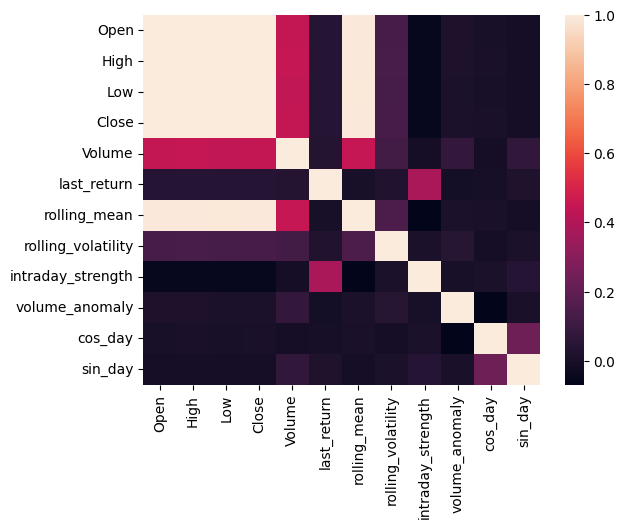

In [19]:
sns.heatmap(corr)